In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
x = np.arange(0,10,1)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
y = x*2+4
y

array([ 4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

<Axes: >

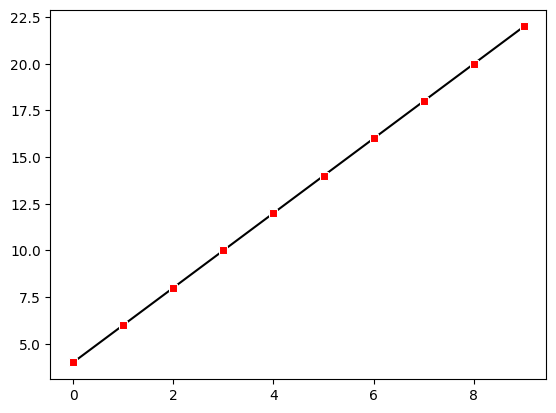

In [33]:
sns.lineplot(x=x,y=y, marker='s', markerfacecolor='red')